<a href="https://colab.research.google.com/github/Shashank1202/Deep_Learning/blob/main/Regression_models_Low_level_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building Regression Model for Iris dataset using Tensorflow (for low level coding)

In [ ]:
#import libraries

import numpy as np
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [ ]:
#Disabling tensorflow version2
#Create a graph using session

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Your TensorFlow 1.x code using Session goes here
sess = tf.Session()
# ... Rest of your code using the session


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#Load the data

from sklearn import datasets

iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])  # Selecting the fourth column of the iris data
y_vals = np.array([x[0] for x in iris.data])  # Selecting the first column of the iris data



In [ ]:
#Declare batch size

batch_size=25

In [ ]:
#Initialize placeholders

x_data=tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target=tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [ ]:
#Create variables for linear regression

A=tf.Variable(tf.random_normal(shape=[1,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))

In [ ]:
#Declare model operations

model_output=tf.add(tf.matmul(x_data,A),b)

In [ ]:
#Declare loss function (L2 Loss)

loss=tf.reduce_mean(tf.square(y_target - model_output))

In [ ]:
#Initialize varibles

init=tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
#Declare optimizer

my_opt=tf.train.GradientDescentOptimizer(0.05)
train_step=my_opt.minimize(loss)

In [ ]:
#Training Loop

loss_vec=[]
for i in range(100):
  rand_index=np.random.choice(len(x_vals), size=batch_size)
  rand_x=np.transpose([x_vals[rand_index]])
  rand_y=np.transpose([y_vals[rand_index]])
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss=sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
  loss_vec.append(temp_loss)
  if (i+1)%25==0:
    print('Step #'+ str(i+1)+ 'A = '+str(sess.run(A)))
    print('Loss = '+str(temp_loss))

Step #25A = [[1.7086793]]
Loss = 0.5131999
Step #50A = [[1.3777441]]
Loss = 0.41689005
Step #75A = [[1.128497]]
Loss = 0.2338989
Step #100A = [[1.0633887]]
Loss = 0.18413171


In [ ]:
#Get the Optimal coefficients

[slope]=sess.run(A)
[y_intercept]=sess.run(b)


In [ ]:
#Get best fit line

best_fit=[]
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

<function matplotlib.pyplot.show(close=None, block=None)>

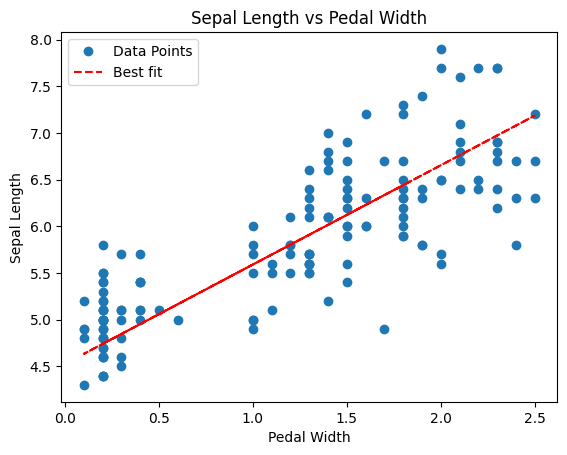

In [ ]:
#Plot the result

plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r--', label='Best fit')
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show

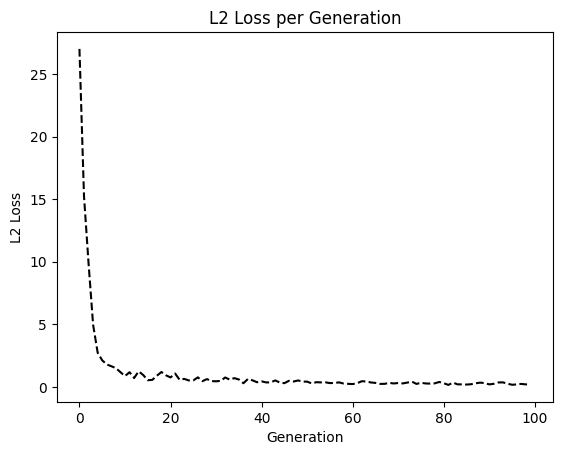

In [ ]:
  #Plot loss over time

  plt.plot(loss_vec, 'k--')
  plt.title('L2 Loss per Generation')
  plt.xlabel('Generation')
  plt.ylabel('L2 Loss')
  plt.show()